In [33]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import sympy as sym
import math as m
from math import e
import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)

# a.

In [34]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [35]:
def GetLaguerre(n,x):
    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1-x
    else:
        poly =  ((2*n-1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
   
    return sym.expand(poly,x)

In [36]:
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [37]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [38]:
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [39]:
def GetAllRootsGLag(n):

    xn = np.linspace(0, n + np.sqrt(n)*(n-1),100)
    
    Laguerre = []
    DLaguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [40]:
def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)
    
    Laguerre = GetLaguerre(n+1, x)
    
    Lpoly = sym.lambdify([x],Laguerre,'numpy')
    Weights = Roots/((n+1)**(2) * (Lpoly(Roots))**2)
    
    return Weights, Roots

In [41]:
f= lambda x: (e**(x)*x**(3))/(e**(x)-1)

In [42]:
pesos = GetWeightsGLag(3)
raices = GetAllRootsGLag(3)

In [43]:
I=0
for i in range(3):

    I += pesos[i]*f(raices[i])
    
I

IndexError: tuple index out of range

In [ ]:
(np.pi**(4)/15)-I

0.012809230839073926

# b.

In [ ]:
def integral(N):
    Weights, Roots = GetWeightsGLag(N) 
    
    
    I=0
    for i in range(N):
        I += Weights[i]*f(Roots[i])
    
    return I

In [ ]:
def error_r(N):
    return integral(N)/(np.pi**(4)/15)

In [ ]:
error_r(3)

0.9980275099526487

In [ ]:
n=np.linspace(2,10, 9, dtype=int)

In [ ]:
n

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
error =np.array([])

for i in n:
    error = np.append(error, error_r(i))

IndexError: index 7 is out of bounds for axis 0 with size 7

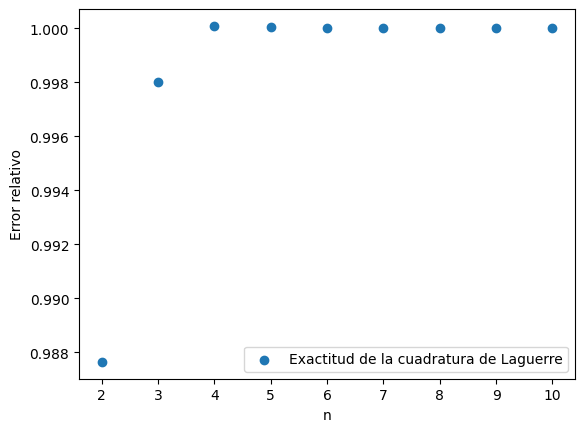

In [ ]:
plt.scatter(n, error, label="Exactitud de la cuadratura de Laguerre")
plt.xlabel('n')
plt.ylabel('Error relativo')
plt.legend()

Ejercicio 19


In [ ]:
def funcion(T,dT):
    return 1/2*(np.tanh(np.sqrt(x**2 + dT**2)*(Td/2*T))/np.sqrt(x**2+dT**2))

In [ ]:
#Polinomio legendre
n = 50
def GetLegendre(n,x,y):
    
    y = (x**2 - 1)**n
    
    poly = sym.diff( y,x,n )/(2**n*np.math.factorial(n))
    
    return poly

polinomio = GetLegendre(50,x,y)
print(polinomio)

(140737488355328*x**50 + 86201711617638400*x**48*(x**2 - 1) + 12154441338087014400*x**46*(x**2 - 1)**2 + 698880376940003328000*x**44*(x**2 - 1)**3 + 20660651143288848384000*x**42*(x**2 - 1)**4 + 355776412687433969172480*x**40*(x**2 - 1)**5 + 3854244470780534666035200*x**38*(x**2 - 1)**6 + 27648304724068529287987200*x**36*(x**2 - 1)**7 + 136081499813774792589312000*x**34*(x**2 - 1)**8 + 471245193799553448411136000*x**32*(x**2 - 1)**9 + 1168688080622892552059617280*x**30*(x**2 - 1)**10 + 2100740971367596116305510400*x**28*(x**2 - 1)**11 + 2757222524919969902650982400*x**26*(x**2 - 1)**12 + 2651175504730740291010560000*x**24*(x**2 - 1)**13 + 1866643977820623266119680000*x**22*(x**2 - 1)**14 + 958210575281253276608102400*x**20*(x**2 - 1)**15 + 355585955670777583116288000*x**18*(x**2 - 1)**16 + 94125694148147007295488000*x**16*(x**2 - 1)**17 + 17430684101508705054720000*x**14*(x**2 - 1)**18 + 2196942178999019612160000*x**12*(x**2 - 1)**19 + 181247729767419118003200*x**10*(x**2 - 1)**20 + 92

C:\Users\Flutt\AppData\Local\Temp\ipykernel_43120\883359404.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poly = sym.diff( y,x,n )/(2**n*np.math.factorial(n))


In [48]:
Legendre = []
DLegendre = []

for i in range(n+1):
    Poly = GetLegendre(i,x,y)
    Legendre.append(Poly)
    DLegendre.append(sym.diff(Poly,x,1))
    

C:\Users\Flutt\AppData\Local\Temp\ipykernel_43120\883359404.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poly = sym.diff( y,x,n )/(2**n*np.math.factorial(n))


KeyboardInterrupt: 

In [ ]:
Legendre

In [ ]:
DLegendre

In [50]:
n = 50

def GetAllRoots(n,xn,Legendre,DLegendre):
    
    poly = sym.lambdify([x],Legendre[n],'numpy')
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [51]:
xn = np.linspace(-1,1,100)
Roots1 = GetAllRoots(n,xn,Legendre,DLegendre)

IndexError: list index out of range

In [45]:
Roots1

NameError: name 'Roots1' is not defined

In [57]:

def GetWeights(Roots,DLegendre):
    
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Weights = 2/((1-Roots**2)*Dpoly(Roots)**2)
    
    return Weights

pesos = GetWeights(Roots1,DLegendre)

IndexError: list index out of range

In [49]:
#cargar los puntos
dT = 10**-4
funcion = funcion(Roots1,dT)
print(funcion)

NameError: name 'Roots1' is not defined

In [52]:
GetWeights(Roots1,DLegendre)

NameError: name 'GetWeights' is not defined

In [55]:
#c
#T= np.linspace(1,20,10**-4)
#calcular integral
def funcion(T,dT):
    return 1/2*(sym.tanh(sym.sqrt(x**2 + dT**2)*(Td/2*T))/sym.sqrt(x**2+dT**2))

    
dT= 10**-4
I = 0
for i in range(5):
    I += pesos[i]*funcion(Roots1[i],dT)

NameError: name 'Roots1' is not defined

In [ ]:
I